In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Regression Techniques in Sklearn

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1z6ozvkqSqG9dxFCgFAOoQ5aIF8eAGjJf?usp=sharing)

## Decision Boundary

In [93]:
# Generate synthetic binary classification data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
X[0:5]

array([[ 1.22831184, -0.75717844],
       [ 0.69840909, -1.38029525],
       [ 2.54881729,  2.50225822],
       [ 0.57357881, -1.35297943],
       [ 0.58590018, -1.33745666]])

In [95]:
y[0:5]

array([0, 0, 1, 0, 0])

In [96]:
# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

LogisticRegression()

In [97]:
def plot_decision_boundary(X, y, model, title, errors=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Step size in the mesh
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plotting in red and blue
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

     # Plot residuals if Linear Regression errors are passed
    if errors is not None:
        for i, error in enumerate(errors):
            plt.plot([X[i, 0], X[i, 0]], [X[i, 1], X[i, 1] + error], 'k-')

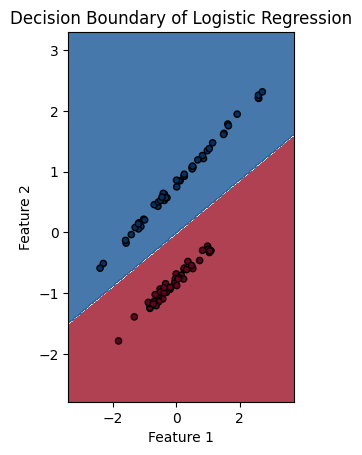

In [98]:
plt.subplot(1, 2, 2)
plot_decision_boundary(X_scaled, y, log_reg, 'Decision Boundary of Logistic Regression')
plt.show()

## Fitting a Model Classifier

In [99]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:100, 0:2]  # We use the first 100 instances and only the first two features for simplicity
y = iris.target[:100]    # Corresponding targets

In [100]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [102]:
# Training the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [103]:
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")

Logistic Regression Accuracy: 1.00


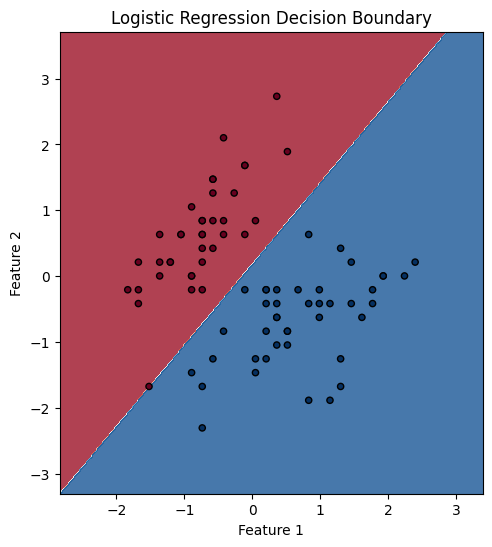

In [104]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, log_reg, 'Logistic Regression Decision Boundary')

## Regression Metrics

In [105]:
# Predict probabilities on the test set
probabilities = log_reg.predict_proba(X_test)[:, 1]

In [106]:
# Define different thresholds
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

In [107]:
# Initialize a DataFrame to store results
results_df = pd.DataFrame({
    'Feature_1': X_test[:, 0],
    'Feature_2': X_test[:, 1],
    'True_Label': y_test,
    'Predicted_Probability': probabilities
})

In [108]:
results_df

,Feature_1,Feature_2,True_Label,Predicted_Probability
0,0.828528,-0.837638,1,0.985587
1,0.045420,-1.677376,1,0.981358
2,0.671906,0.212034,1,0.838887
3,-1.050931,-0.207835,0,0.132011
4,-0.581066,1.471640,0,0.015335
5,-0.581066,0.631903,0,0.081489
6,-1.364174,1.051772,0,0.004998
7,0.045420,-1.467442,1,0.971489
8,-0.111201,1.261706,0,0.074033
9,-0.581066,0.841837,0,0.054307


In [109]:
# Apply threshold and calculate predictions
def apply_threshold(thresh, probs):
    return [1 if prob > thresh else 0 for prob in probs]

In [110]:
for thresh in thresholds:
    results_df[f'Prediction_Threshold_{thresh}'] = apply_threshold(thresh, probabilities)

In [111]:
for thresh in thresholds:
    acc = accuracy_score(y_test, results_df[f'Prediction_Threshold_{thresh}'])
    print(f"Accuracy at threshold {thresh}: {acc:.2f}")

Accuracy at threshold 0.1: 0.80
Accuracy at threshold 0.3: 1.00
Accuracy at threshold 0.5: 1.00
Accuracy at threshold 0.7: 1.00
Accuracy at threshold 0.9: 0.95


In [112]:
results_df

,Feature_1,Feature_2,True_Label,Predicted_Probability,Prediction_Threshold_0.1,Prediction_Threshold_0.3,Prediction_Threshold_0.5,Prediction_Threshold_0.7,Prediction_Threshold_0.9
0,0.828528,-0.837638,1,0.985587,1,1,1,1,1
1,0.045420,-1.677376,1,0.981358,1,1,1,1,1
2,0.671906,0.212034,1,0.838887,1,1,1,1,0
3,-1.050931,-0.207835,0,0.132011,1,0,0,0,0
4,-0.581066,1.471640,0,0.015335,0,0,0,0,0
5,-0.581066,0.631903,0,0.081489,0,0,0,0,0
6,-1.364174,1.051772,0,0.004998,0,0,0,0,0
7,0.045420,-1.467442,1,0.971489,1,1,1,1,1
8,-0.111201,1.261706,0,0.074033,0,0,0,0,0
9,-0.581066,0.841837,0,0.054307,0,0,0,0,0


In [113]:
def plot_decision_boundary_threshold(df, model, threshold, feature_columns, ax):
    x_min, x_max = df[feature_columns[0]].min() - 1, df[feature_columns[0]].max() + 1
    y_min, y_max = df[feature_columns[1]].min() - 1, df[feature_columns[1]].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plotting
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    Z = (Z > threshold).astype(int)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    scatter = ax.scatter(df[feature_columns[0]], df[feature_columns[1]], c=df['True_Label'], cmap=plt.cm.RdBu, edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Logistic Regression Boundary at Threshold {threshold}')
    return scatter

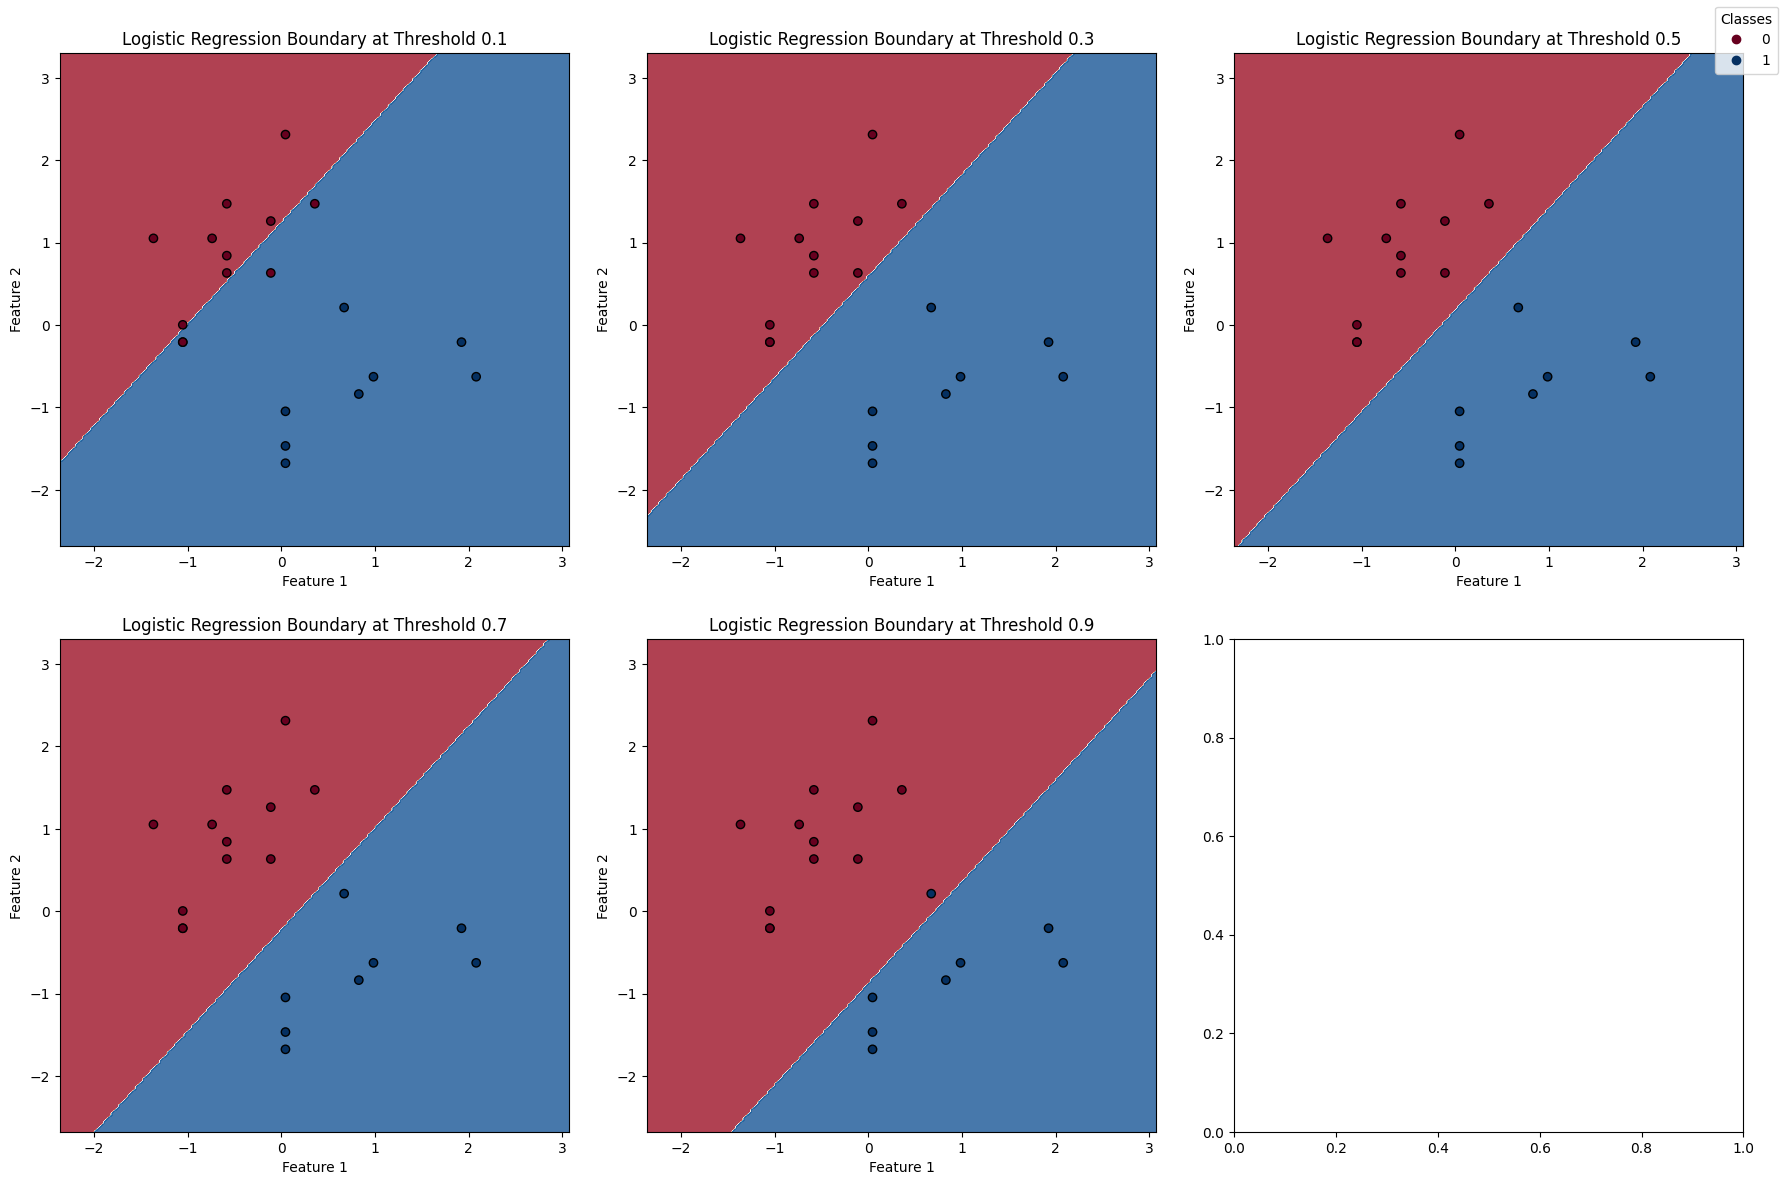

In [114]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust subplot grid as needed
axes = axes.flatten()
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

for ax, thresh in zip(axes, thresholds):
    scatter = plot_decision_boundary_threshold(results_df, log_reg, thresh, ['Feature_1', 'Feature_2'], ax)

fig.tight_layout(pad=2.0)
fig.legend(*scatter.legend_elements(), title="Classes", loc='upper right')
plt.show()